# Estudo de ampacidade por estação INMET

In [1]:
from normaslt import geral
import pandas as pd
import seaborn as sns
import numpy as np
from math import pi, log, sqrt
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from reliability.Probability_plotting import Lognormal_probability_plot

In [2]:
cabo = geral.dbCabo.CAA_HAWK
amp = 800
estacao = 'Recife'
rugcond = 0.9
absorcao = 0.6
emicond = 0.6

In [3]:
dados, _, _, alt = geral.readEstacao(estacao, 2015, 2023)

/home/carloska/programas/nbr5422/python/normaslt/geral.py:363: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rad'] = df['rad'].fillna(0)
/home/carloska/programas/nbr5422/python/normaslt/geral.py:363: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rad'] = df['rad'].fillna(0)
/home/carloska/programas/nbr5422/python/normaslt/geral.py:363: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.s

In [4]:
dados['tCond'] = dados.apply(lambda x: geral.tempCondutorCigre(amp, x.ventoHor, pi/2, x.tMax, x.rad, alt, cabo, rugcond, absorcao, emicond), axis=1)
dados.describe().round(2)

26.5 800.0
176.5 769.9264283881434


ValueError: f(a) and f(b) must have different signs

## Modelo simplificado
Distribuição log-normal de três parâmetros:
$$f(t) = \frac{1}{(t-t_{min}) \beta \sqrt{2 \pi}} \exp \left \lbrace -\frac{[\ln (t - t_{min}) - \alpha]^2}{2 \beta^2} \right \rbrace$$

In [17]:
# Ajustes dos parâmetros conforme obtido no método completo
tmed = dados['tCond'].mean()
tmin = dados['tCond'].min()
tdp = dados['tCond'].std()
beta = sqrt(log((tdp / (tmed - tmin)) ** 2 + 1))
alpha = log(tmed - tmin) - 0.5 * beta ** 2
print(tmed, tmin, tdp, alpha, beta)
t0 = np.linspace(tmin, tmin + 100, 100)
pdf = lognorm(loc=tmin, s=beta, scale=np.exp(alpha))

# Aproximações 
tmedmax = dados['tMax'].mean()
dp = 12


27.93887322602938 18.3 4.621851760567718 2.1623290642496293 0.45491790968162116


<Axes: >

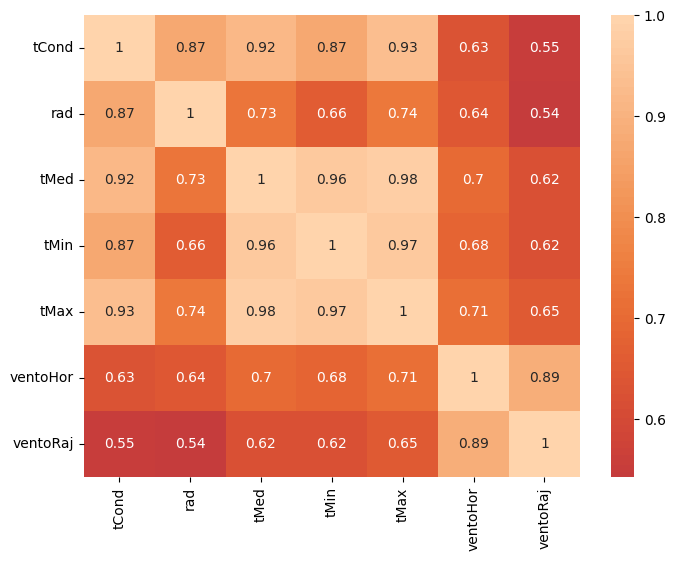

In [18]:
corr = dados[['tCond','rad','tMed','tMin','tMax','ventoHor','ventoRaj']].corr()
ax = sns.heatmap(corr, center=0, annot=True)
ax.figure.set_size_inches(8, 6)
ax

<Axes: ylabel='Density'>

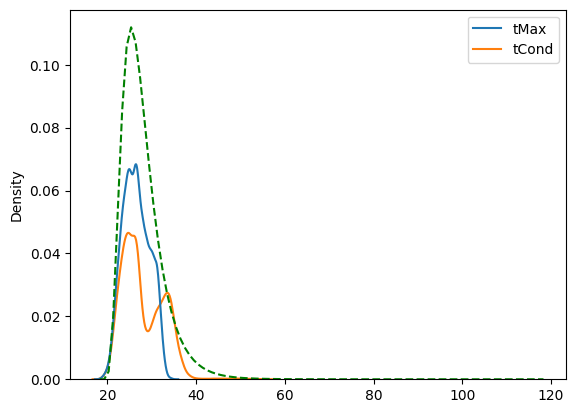

In [19]:
ax = sns.kdeplot(dados[['tMax','tCond']])
ax.plot(t0, pdf.pdf(t0), 'g--', label='tCond Simplificado')
ax

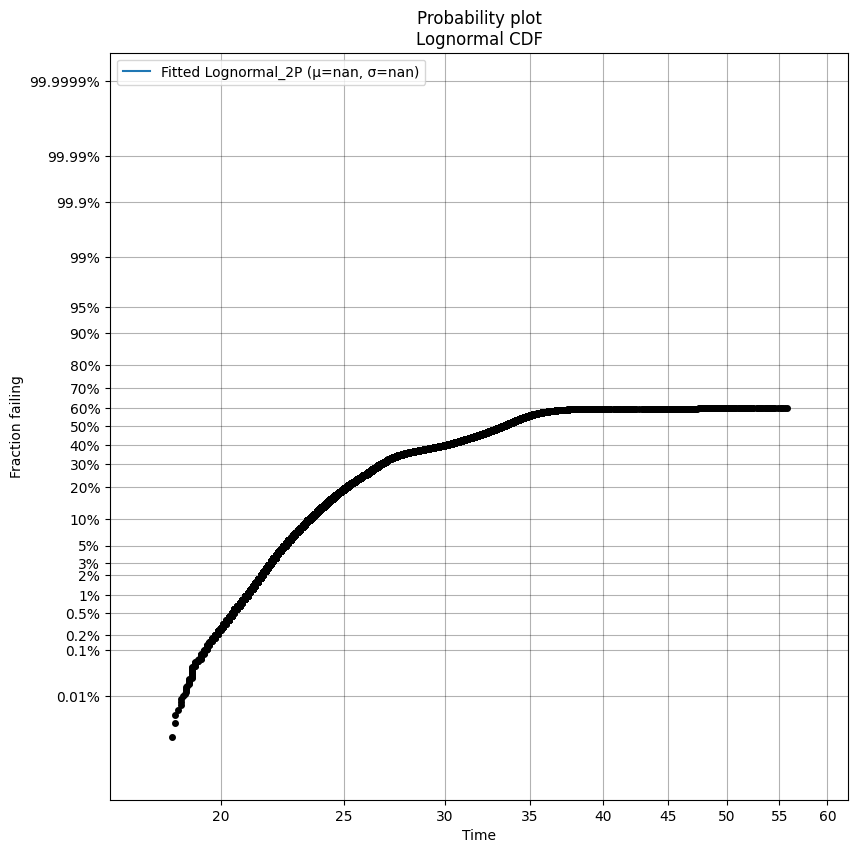

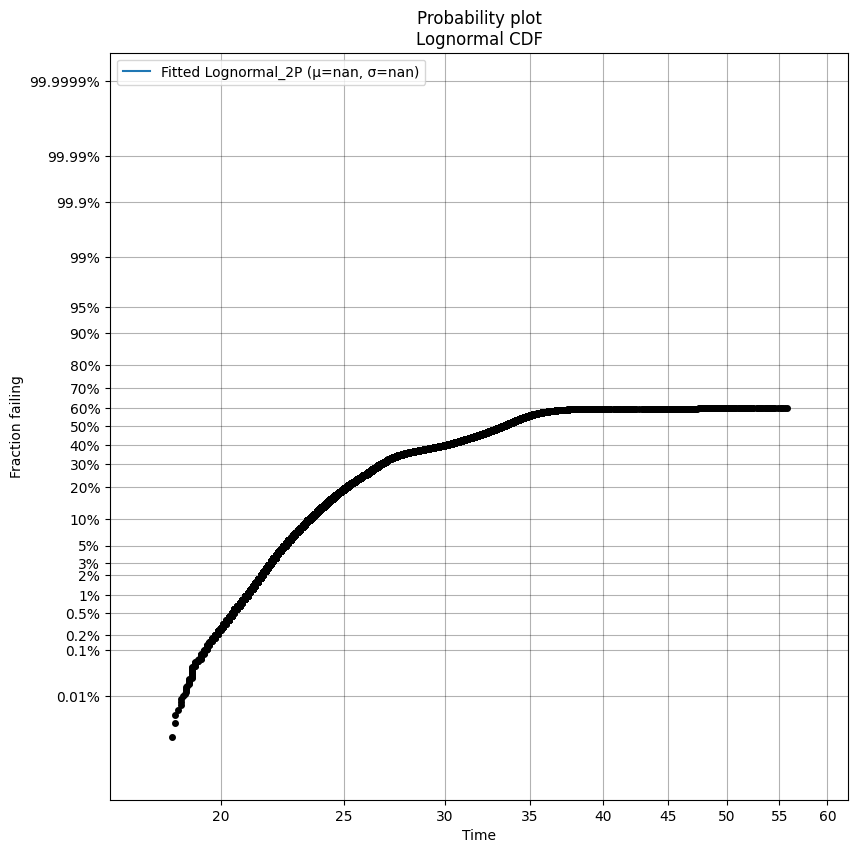

In [23]:
Lognormal_probability_plot(failures=dados['tCond'].to_numpy())

<Axes: ylabel='Density'>

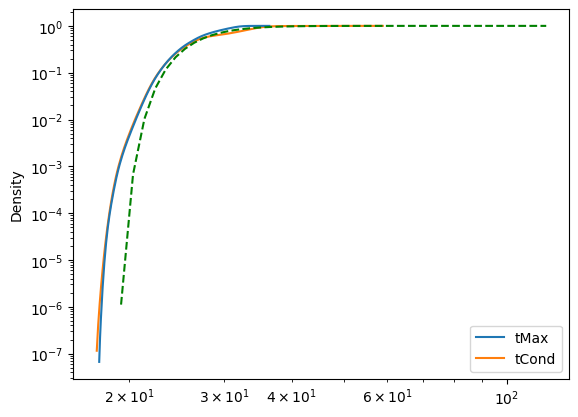

In [12]:
ax = sns.kdeplot(dados[['tMax','tCond']], cumulative=True, common_norm=False, log_scale=[True, True])
ax.plot(t0, pdf.cdf(t0), 'g--', label='tCond Simplificado')
ax

<Axes: title={'center': 'Temperatura (°C)'}>

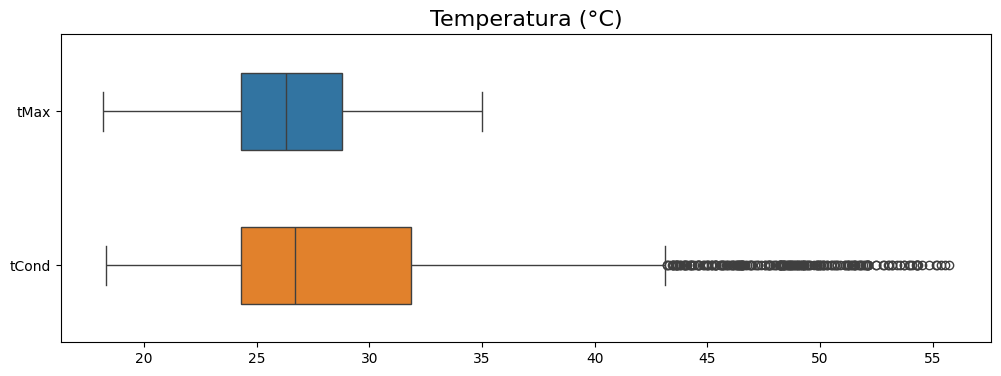

In [8]:
ax = sns.boxplot(data=dados[['tMax','tCond']], orient='h', width=0.5)
ax.figure.set_size_inches(12, 4)
ax.set_title('Temperatura (°C)', fontsize=16)
ax